bird image classfication ML model

In [193]:
import numpy as np
import pandas as pd

import os
import re
from random import randint

import matplotlib.pyplot as plt
%matplotlib inline

1. prepare image data (path, class, bounding box, etc.)

In [194]:
path_read_image = './data/CUB_200_2011/images.txt'
os.path.isfile(path_read_image) # read image

True

In [195]:
# read image
with open(path_read_image, 'r') as f:
    image_dirs = ['./data/CUB_200_2011/images/' + re.sub(r'[0-9]*\s', '', s) for s in f.readlines()]
    num_images = len(image_dirs)
print('number of images: ', num_images)
print('image_dirs:')
image_dirs[:10]

number of images:  11788
image_dirs:


['./data/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0046_18.jpg',
 './data/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0009_34.jpg',
 './data/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0002_55.jpg',
 './data/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0074_59.jpg',
 './data/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0014_89.jpg',
 './data/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0085_92.jpg',
 './data/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0031_100.jpg',
 './data/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0051_796103.jpg',
 './data/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0010_796097.jpg',
 './data/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0025_796057.jpg']

In [196]:
path_classes = './data/CUB_200_2011/classes.txt'
os.path.isfile(path_classes) #set of class

True

In [197]:
#set of class
with open(path_classes, 'r') as f:
    values =  [re.sub(r'[0-9 .]*\n*', '', s) for s in f.readlines()]
    keys = np.arange(1, len(values)+1, 1)
    classes = {
        k:v for (k,v) in zip(keys, values)
    }
print('classes:')
list(classes.items())[:10]

classes:


[(1, 'Black_footed_Albatross'),
 (2, 'Laysan_Albatross'),
 (3, 'Sooty_Albatross'),
 (4, 'Groove_billed_Ani'),
 (5, 'Crested_Auklet'),
 (6, 'Least_Auklet'),
 (7, 'Parakeet_Auklet'),
 (8, 'Rhinoceros_Auklet'),
 (9, 'Brewer_Blackbird'),
 (10, 'Red_winged_Blackbird')]

In [198]:
path_class_labels = './data/CUB_200_2011/image_class_labels.txt'
os.path.isfile(path_class_labels)

True

In [199]:
#class label
with open(path_class_labels, 'r') as f:
    keys = image_dirs
    values = [[int(c) for c in e.split()][1] for e in f.readlines()]
    images = {k:v for (k,v) in zip(keys, values)}
    num_images = len(keys)
    num_classes = len(set(values))
print('num_image:', num_images)
print('num_class: ', num_classes)

print('images: ')
list(images.items())[:5]

num_image: 11788
num_class:  200
images: 


[('./data/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0046_18.jpg',
  1),
 ('./data/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0009_34.jpg',
  1),
 ('./data/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0002_55.jpg',
  1),
 ('./data/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0074_59.jpg',
  1),
 ('./data/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0014_89.jpg',
  1)]

In [200]:
path_train_test_split = './data/CUB_200_2011/train_test_split.txt'
os.path.isfile(path_train_test_split)

True

In [201]:
# train-test-split (0 for train, 1 for test)
with open(path_train_test_split, 'r') as f:
    train_test_split = [[int(l) for l in e.strip().split()] for e in f.readlines()]
labels = ([l[1] for l in train_test_split])
num_train = labels.count(1)
num_test = labels.count(0)
print('num_train:', num_train)
print('num_test:', num_test)
print('total:', num_train + num_test)

num_train: 5994
num_test: 5794
total: 11788


In [202]:
from keras.utils import load_img

# helper function to draw a bird image
def plot_image(img_path):
    img = load_img(img_path)
    plt.imshow(img)
    plt.title(classes[images[img_path]])

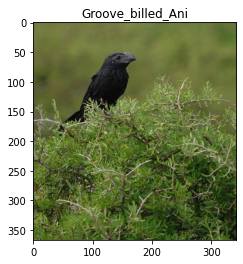

In [203]:
path_img = image_dirs[randint(0, num_images-1)]
plot_image(path_img)

In [204]:
data_birds = {
    'bird-name': [classes[images[image_dir]] for image_dir in image_dirs],
    'image-label': [images[image_dir] for image_dir in image_dirs],
    'image-path': image_dirs,
    'train-test-label': labels
}

In [205]:
df_birds = pd.DataFrame(data_birds)
df_birds['image-label'] = df_birds['image-label'].astype('string')
df_birds.head()

,bird-name,image-label,image-path,train-test-label
0,Black_footed_Albatross,1,./data/CUB_200_2011/images/001.Black_footed_Al...,0
1,Black_footed_Albatross,1,./data/CUB_200_2011/images/001.Black_footed_Al...,1
2,Black_footed_Albatross,1,./data/CUB_200_2011/images/001.Black_footed_Al...,0
3,Black_footed_Albatross,1,./data/CUB_200_2011/images/001.Black_footed_Al...,1
4,Black_footed_Albatross,1,./data/CUB_200_2011/images/001.Black_footed_Al...,1


In [206]:
df_birds_train = df_birds[df_birds['train-test-label']==1].drop(['train-test-label'], axis=1)
df_birds_val_1 = df_birds_train.groupby(by='image-label', as_index=False).apply(lambda x: x.sample(5)).reset_index().drop(columns=['level_0']).set_index('level_1')
df_birds_val_1.index.name = None
df_birds_train = df_birds_train.drop(index=df_birds_val_1.index)

In [207]:
df_birds_train.shape, df_birds_val_1.shape

((4994, 3), (1000, 3))

In [208]:
df_birds_test = df_birds[df_birds['train-test-label']==0].drop(['train-test-label'], axis=1)
df_birds_val_2 = df_birds_test.groupby(by='image-label', as_index=False).apply(lambda x: x.sample(5)).reset_index().drop(columns=['level_0']).set_index('level_1')
df_birds_val_2.index.name = None
df_birds_test = df_birds_test.drop(index=df_birds_val_2.index)

In [209]:
df_birds_test.shape, df_birds_val_2.shape

((4794, 3), (1000, 3))

In [210]:
df_birds_train = df_birds_train.append(df_birds_test)
df_birds_val = df_birds_val_1
df_birds_test = df_birds_val_2

C:\Users\Windows\AppData\Local\Temp\ipykernel_4400\65438447.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_birds_train = df_birds_train.append(df_birds_test)


In [211]:
df_birds_train = df_birds_train.sample(frac=1)
df_birds_val = df_birds_val_1.sample(frac=1)
df_birds_test = df_birds_val_2.sample(frac=1)

In [212]:
df_birds_train.shape, df_birds_val.shape, df_birds_test.shape

((9788, 3), (1000, 3), (1000, 3))

2. image dataset

In [213]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
)

img_size = 128
target_size = (img_size, img_size)
batch_size = 64
train_generator = datagen.flow_from_dataframe(dataframe=df_birds_train,
                                              x_col='image-path',
                                              y_col='bird-name',
                                              target_size=target_size,
                                              batch_size=batch_size,
                                              )      
val_generator = datagen.flow_from_dataframe(dataframe=df_birds_val,
                                              x_col='image-path',
                                              y_col='bird-name',
                                              target_size=target_size,
                                              batch_size=batch_size,
                                              )      
test_generator = datagen.flow_from_dataframe(dataframe=df_birds_test,
                                              x_col='image-path',
                                              y_col='bird-name',
                                              target_size=target_size,
                                              batch_size=batch_size,
                                              )

Found 9788 validated image filenames belonging to 200 classes.
Found 1000 validated image filenames belonging to 200 classes.
Found 1000 validated image filenames belonging to 200 classes.


3. neural network class

In [214]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dropout, Dense

In [215]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='valid', input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', padding='valid'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu', padding='valid'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [216]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_24 (Ba  (None, 63, 63, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_29 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                      

4. model training

In [217]:
from keras.losses import CategoricalCrossentropy
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [218]:
loss = CategoricalCrossentropy()
optimizer = Adam(learning_rate=0.001)

In [219]:
model.compile(
    loss = loss,
    optimizer = optimizer,
    metrics= ['accuracy'],
)

In [220]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

In [227]:
num_epochs = 200

history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=num_epochs,
    verbose=1,
    validation_data=val_generator,
    validation_steps=8,
    # callbacks=[reduce_lr, early_stop]
)

Epoch 1/200
8/8 [==============================] - 4s 560ms/step - loss: 6.2316 - accuracy: 0.0059 - val_loss: 5.3177 - val_accuracy: 0.0020
Epoch 2/200
8/8 [==============================] - 4s 529ms/step - loss: 5.7469 - accuracy: 0.0176 - val_loss: 5.3400 - val_accuracy: 0.0059
Epoch 3/200
8/8 [==============================] - 4s 541ms/step - loss: 5.7249 - accuracy: 0.0156 - val_loss: 5.3817 - val_accuracy: 0.0020
Epoch 4/200
8/8 [==============================] - 4s 549ms/step - loss: 5.5780 - accuracy: 0.0137 - val_loss: 5.3936 - val_accuracy: 0.0059
Epoch 5/200
8/8 [==============================] - 4s 577ms/step - loss: 5.4956 - accuracy: 0.0117 - val_loss: 5.3968 - val_accuracy: 0.0020
Epoch 6/200
8/8 [==============================] - 4s 546ms/step - loss: 5.4220 - accuracy: 0.0176 - val_loss: 5.4481 - val_accuracy: 0.0039
Epoch 7/200
8/8 [==============================] - 4s 546ms/step - loss: 5.4567 - accuracy: 0.0098 - val_loss: 5.5155 - val_accuracy: 0.0039
Epoch 8/200
8

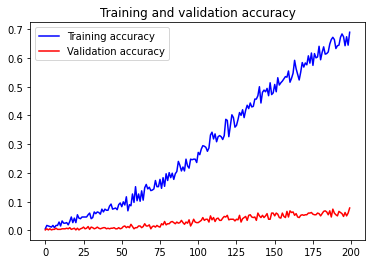

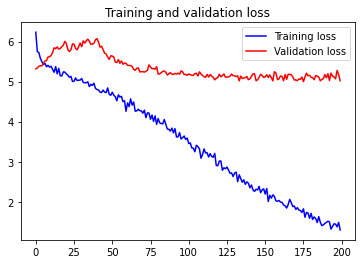

In [228]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')

plt.title('Training and validation loss')
plt.legend()

5. model prediction

In [230]:
preds = model.predict(test_generator, batch_size=batch_size, verbose = 1)
preds.shape

16/16 [==============================] - 3s 169ms/step


(1000, 200)

6. model evaluation

In [229]:
results = model.evaluate(test_generator, verbose=1)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

16/16 [==============================] - 3s 203ms/step - loss: 5.0155 - accuracy: 0.0520
    Test Loss: 5.01547
Test Accuracy: 5.20%
